In [1]:
# Import required Libraries

import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [2]:
# reading the datafile
df = pd.read_csv('../Data/Watson_healthcare.csv')
df.head()

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1313919,41,No,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,1200302,49,No,Travel_Frequently,279,Maternity,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,1060315,37,Yes,Travel_Rarely,1373,Maternity,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,1272912,33,No,Travel_Frequently,1392,Maternity,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,1414939,27,No,Travel_Rarely,591,Maternity,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df.columns

Index(['EmployeeID', 'Age', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'Shift',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [4]:
def features (df):

    
    df['BusinessTravel'] = df['BusinessTravel'].apply(lambda x:1 if x == 'Travel_Frequently' else 0)
    df['EducationField'] = df['EducationField'].apply(lambda x: 1 if x in ["Life Sciences", "Medical", "Other"] else 0)
    df['EnvironmentSatisfaction'] = df['EnvironmentSatisfaction'].apply(lambda x: 1 if x == 1 else 0)
    df['Job'] = round((df['JobInvolvement']+df['JobLevel']+df['JobSatisfaction'])/3,2)
    df['JobRole'] = df['JobRole'].apply(lambda x: 1 if x in ['Nurse', 'Other'] else 0)
    df['MaritalStatus'] = df['MaritalStatus'].apply(lambda x: 1 if x == 'Single' else 0)
    df['Shift'] = df['Shift'].apply(lambda x: 1 if x in [0, 3] else 0)
    df['WorkLifeBalance'] = df['WorkLifeBalance'].apply(lambda x: 1 if x == 1 else 0)
    df['OverTime']= df['OverTime'].replace({'No':0,'Yes':1})
    df['Attrition']= df['Attrition'].replace({'No':0,'Yes':1})

    columns_to_drop=['EmployeeID','DailyRate','Department','Education','EmployeeCount','Gender','HourlyRate',
                     'MonthlyRate','NumCompaniesWorked','Over18','PercentSalaryHike','PerformanceRating',
                     'RelationshipSatisfaction','StandardHours','JobInvolvement','JobLevel','JobSatisfaction']
    df.drop(columns=columns_to_drop, inplace=True)

    return df


In [24]:
# import Features1 as fe
# import numpy as np
# fe.features(df)


In [5]:
features (df)

,Age,Attrition,BusinessTravel,DistanceFromHome,EducationField,EnvironmentSatisfaction,JobRole,MaritalStatus,MonthlyIncome,OverTime,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Job
0,41,0,0,1,1,0,1,1,5993,1,1,8,0,1,6,4,0,5,3.00
1,49,0,1,8,1,0,1,0,5130,0,0,10,3,0,10,7,1,7,2.00
2,37,1,0,2,1,0,1,1,2090,1,1,7,3,0,0,0,0,0,2.00
3,33,0,1,3,1,0,1,0,2909,1,1,8,3,0,8,7,3,0,2.33
4,27,0,0,2,1,1,1,0,3468,0,0,6,3,0,2,2,2,2,2.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,26,1,0,24,0,0,1,1,2340,1,1,1,3,1,1,0,0,0,2.00
1672,46,0,0,10,0,0,1,0,9071,1,0,15,3,0,3,2,1,2,3.00
1673,20,0,0,1,1,0,1,1,2836,0,1,1,0,0,1,0,0,0,1.67
1674,39,0,0,1,1,0,0,0,12742,0,0,21,3,0,21,6,11,8,3.33


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1676 entries, 0 to 1675
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      1676 non-null   int64  
 1   Attrition                1676 non-null   int64  
 2   BusinessTravel           1676 non-null   int64  
 3   DistanceFromHome         1676 non-null   int64  
 4   EducationField           1676 non-null   int64  
 5   EnvironmentSatisfaction  1676 non-null   int64  
 6   JobRole                  1676 non-null   int64  
 7   MaritalStatus            1676 non-null   int64  
 8   MonthlyIncome            1676 non-null   int64  
 9   OverTime                 1676 non-null   int64  
 10  Shift                    1676 non-null   int64  
 11  TotalWorkingYears        1676 non-null   int64  
 12  TrainingTimesLastYear    1676 non-null   int64  
 13  WorkLifeBalance          1676 non-null   int64  
 14  YearsAtCompany          

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE

In [8]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DistanceFromHome',
       'EducationField', 'EnvironmentSatisfaction', 'JobRole', 'MaritalStatus',
       'MonthlyIncome', 'OverTime', 'Shift', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'Job'],
      dtype='object')

In [10]:
#Define the target

X= df.drop('Attrition',axis=1)
y= df['Attrition']

In [11]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#Balancing the data
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)

In [12]:
X_train.shape

(2362, 18)

In [13]:
X_train.head()

,Age,BusinessTravel,DistanceFromHome,EducationField,EnvironmentSatisfaction,JobRole,MaritalStatus,MonthlyIncome,OverTime,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Job
0,40,0,2,1,0,0,0,18041,0,1,21,2,0,20,15,1,12,3.67
1,40,0,24,0,1,1,0,3319,0,0,9,3,0,9,8,4,7,3.00
2,25,0,13,1,0,1,0,2096,0,1,7,1,0,7,4,0,6,2.33
3,33,0,1,1,1,0,0,16184,0,0,10,2,0,6,1,0,5,3.67
4,39,1,2,0,0,1,1,10938,0,1,20,1,0,19,6,11,8,3.00


In [14]:

# Define the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Age','DistanceFromHome', 'MonthlyIncome', 'TotalWorkingYears', 'TrainingTimesLastYear',
                                    'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager','Job']),  # Apply StandardScaler to numerical columns
         ],
    remainder='passthrough'
)

# Fit and transform the data using the preprocessor
transformed_data = preprocessor.fit_transform(X)

# Get the feature names after transformation
feature_names = preprocessor.get_feature_names_out()

# Convert the transformed data to a DataFrame with column labels
transformed_X = pd.DataFrame(transformed_data, columns=feature_names)

# X_scaled.head()
transformed_X.head()


,num__Age,num__DistanceFromHome,num__MonthlyIncome,num__TotalWorkingYears,num__TrainingTimesLastYear,num__YearsAtCompany,num__YearsInCurrentRole,num__YearsSinceLastPromotion,num__YearsWithCurrManager,num__Job,remainder__BusinessTravel,remainder__EducationField,remainder__EnvironmentSatisfaction,remainder__JobRole,remainder__MaritalStatus,remainder__OverTime,remainder__Shift,remainder__WorkLifeBalance
0,0.452933,-1.008126,-0.110748,-0.426280,-2.178097,-0.169491,-0.073053,-0.681553,0.242949,0.869841,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
1,1.329511,-0.149829,-0.293315,-0.170938,0.151012,0.486551,0.754220,-0.371823,0.804968,-0.906534,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.014644,-0.885512,-0.936423,-0.553950,0.151012,-1.153553,-1.176083,-0.681553,-1.162098,-0.906534,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0
3,-0.423644,-0.762898,-0.763164,-0.426280,0.151012,0.158530,0.754220,0.247636,-1.162098,-0.320330,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
4,-1.081078,-0.885512,-0.644909,-0.681621,0.151012,-0.825533,-0.624568,-0.062094,-0.600079,-0.906534,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0


In [15]:
transformed_X.columns

Index(['num__Age', 'num__DistanceFromHome', 'num__MonthlyIncome',
       'num__TotalWorkingYears', 'num__TrainingTimesLastYear',
       'num__YearsAtCompany', 'num__YearsInCurrentRole',
       'num__YearsSinceLastPromotion', 'num__YearsWithCurrManager', 'num__Job',
       'remainder__BusinessTravel', 'remainder__EducationField',
       'remainder__EnvironmentSatisfaction', 'remainder__JobRole',
       'remainder__MaritalStatus', 'remainder__OverTime', 'remainder__Shift',
       'remainder__WorkLifeBalance'],
      dtype='object')

In [16]:

# Modeling
model = XGBClassifier()
model.fit(X_train, y_train)

# Calculate the training accuracy
train_accuracy = model.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)

# Calculate the testing accuracy
test_accuracy = model.score(X_test, y_test)
print("Testing Accuracy:", test_accuracy)





Training Accuracy: 0.9983065198983911
Testing Accuracy: 0.8839285714285714


Classification Report (Default Threshold):
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       296
           1       0.51      0.45      0.48        40

    accuracy                           0.88       336
   macro avg       0.72      0.70      0.71       336
weighted avg       0.88      0.88      0.88       336



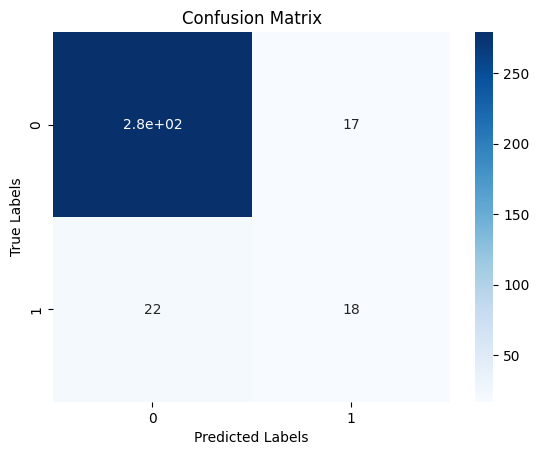

In [17]:
# Make predictions on the testing data
y_pred = model.predict(X_test)
#Classification Report
print("Classification Report (Default Threshold):")
print(classification_report(y_test, y_pred))
# Plot the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_mat, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()




In [27]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for the grid search
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 500]
}

# Create an instance of the XGBClassifier
model = XGBClassifier()

# Create an instance of GridSearchCV with the XGBClassifier model and parameter grid
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)

# Perform the grid search on the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score from the grid search
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and best score
print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Get the best model
best_model_XGB= grid_search.best_estimator_

# Calculate the training accuracy of the best model
train_accuracy = best_model_XGB.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)

# Calculate the testing accuracy of the best model
test_accuracy = best_model_XGB.score(X_test, y_test)
print("Testing Accuracy:", test_accuracy)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Best Score: 0.9261143046317754
Training Accuracy: 0.9970149253731343
Testing Accuracy: 0.9017857142857143


Classification Report (Default Threshold):
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       296
           1       0.69      0.45      0.55        40

    accuracy                           0.91       336
   macro avg       0.81      0.71      0.75       336
weighted avg       0.90      0.91      0.90       336



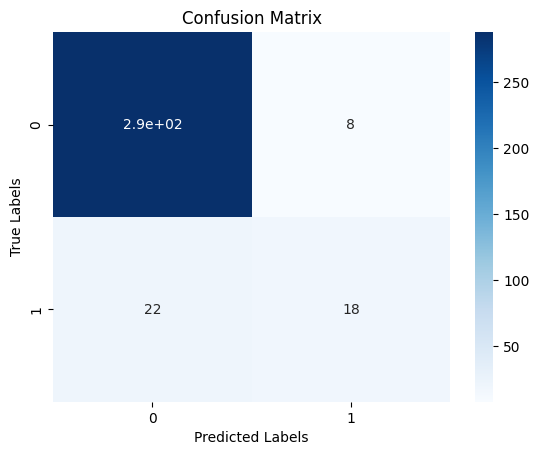

In [28]:
# Make predictions on the testing data
y_pred = best_model.predict(X_test)
#Classification Report
print("Classification Report (Default Threshold):")
print(classification_report(y_test, y_pred))
# Plot the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_mat, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [21]:
# without sampling

In [20]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [21]:
# Define the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Age','DistanceFromHome', 'MonthlyIncome', 'TotalWorkingYears', 'TrainingTimesLastYear',
                                    'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager','Job']),  # Apply StandardScaler to numerical columns
         ],
    remainder='passthrough'
)

# Fit and transform the data using the preprocessor
transformed_data = preprocessor.fit_transform(X)

# Get the feature names after transformation
feature_names = preprocessor.get_feature_names_out()

# Convert the transformed data to a DataFrame with column labels
transformed_X = pd.DataFrame(transformed_data, columns=feature_names)

In [22]:

# Modeling
model = XGBClassifier()
model.fit(X_train, y_train)

# Calculate the training accuracy
train_accuracy = model.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)

# Calculate the testing accuracy
test_accuracy = model.score(X_test, y_test)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.9970149253731343
Testing Accuracy: 0.8988095238095238


Classification Report (Default Threshold):
              precision    recall  f1-score   support

           0       0.96      0.81      0.88       296
           1       0.36      0.78      0.49        40

    accuracy                           0.81       336
   macro avg       0.66      0.79      0.68       336
weighted avg       0.89      0.81      0.83       336



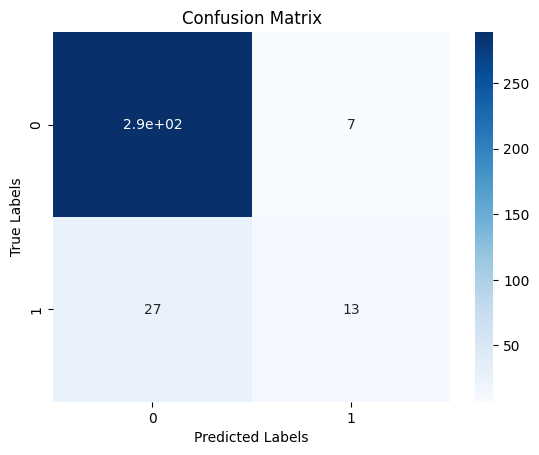

In [23]:
# Make predictions on the testing data
y_pred1 = model.predict(X_test)
#Classification Report
print("Classification Report (Default Threshold):")
print(classification_report(y_test, y_pred))
# Plot the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred1)
sns.heatmap(confusion_mat, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [25]:
# Define the parameter grid for the grid search
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 500]
}

# Create an instance of the XGBClassifier
model = XGBClassifier()

# Create an instance of GridSearchCV with the XGBClassifier model and parameter grid
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)

# Perform the grid search on the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score from the grid search
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and best score
print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Get the best model
best_model_XGB= grid_search.best_estimator_

# Calculate the training accuracy of the best model
train_accuracy = best_model_XGB.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)

# Calculate the testing accuracy of the best model
test_accuracy = best_model_XGB.score(X_test, y_test)
print("Testing Accuracy:", test_accuracy)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Best Score: 0.9261143046317754
Training Accuracy: 0.9970149253731343
Testing Accuracy: 0.9017857142857143


Classification Report (Default Threshold):
              precision    recall  f1-score   support

           0       0.96      0.81      0.88       296
           1       0.36      0.78      0.49        40

    accuracy                           0.81       336
   macro avg       0.66      0.79      0.68       336
weighted avg       0.89      0.81      0.83       336



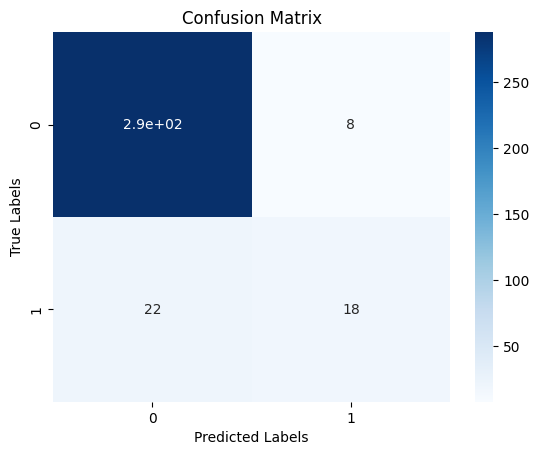

In [26]:
# Make predictions on the testing data
y_pred1 = best_model.predict(X_test)
#Classification Report
print("Classification Report (Default Threshold):")
print(classification_report(y_test, y_pred))
# Plot the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred1)
sns.heatmap(confusion_mat, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
model = LogisticRegression(random_state=0, max_iter=4000)
rfe = RFE(model,n_features_to_select=20)
selector = rfe.fit(X_train, y_train)
print(selector.support_)
print(selector.ranking_)
